In [1]:
#Import Important Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mplt

In [3]:
#Upload Titanin Datasets
dataset = pd.read_csv('tested.csv')

In [5]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
dataset.shape

(418, 12)

In [8]:
dataset.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

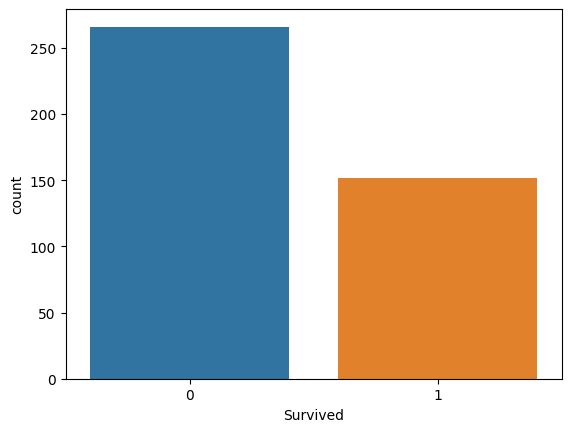

In [11]:
sb.countplot(x='Survived', data = dataset)

<Axes: xlabel='Survived', ylabel='count'>

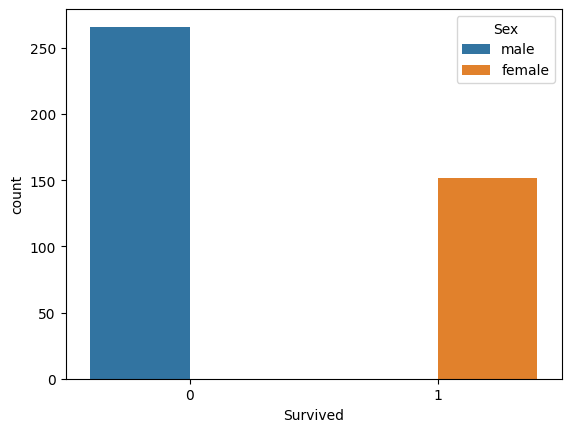

In [12]:
sb.countplot(x= 'Survived', data= dataset, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

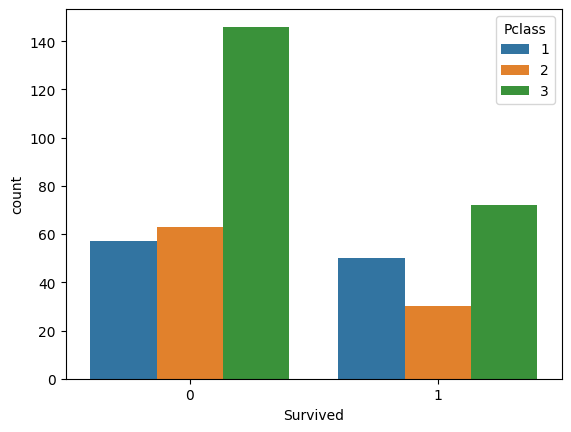

In [17]:
sb.countplot(x='Survived', data= dataset, hue='Pclass')

In [18]:
#Now we move to data Cleaning
#check nullvalues
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Drop Age, Cabin and Fare Columns Because it has null values and 
#we will not requres these values in our prediction
dataset = dataset.drop(['Age'], axis=1)

In [ ]:
dataset = dataset.drop(['Cabin'], axis=1)

In [30]:
dataset = dataset.drop(['Fare'], axis=1)

In [31]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [ ]:
#Convert Male and Female into 0 and 1
import sklearn.preprocessing import LabelEncoder
L_encode = LabelEncoder()
dataset['Sex']= L_encode.fit_transform(dataset['Sex'])

In [34]:
dset_final= dataset

In [36]:
dset_final.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,S


In [37]:
#No convert dependent and independent Variables
x = dset_final[['Pclass', 'Sex']]

In [38]:
x

,Pclass,Sex
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0
...,...,...
413,3,1
414,1,0
415,3,1
416,3,1


In [39]:
y = dset_final['Survived']

In [40]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [43]:
#Model Traning
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
#Apply Randorm Forest Algo
from sklearn.ensemble import RandomForestClassifier
Classifier_RF= RandomForestClassifier(n_estimators = 3, criterion= 'entropy')
Classifier_RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [50]:
#Prediction
pred= Classifier_RF.predict(x_test)

In [57]:
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [58]:
y_test

208    1
11     0
206    1
96     1
48     1
      ..
15     1
269    0
343    1
217    0
310    0
Name: Survived, Length: 84, dtype: int64

In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[51,  0],
       [ 0, 33]], dtype=int64)

In [56]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

